# Predicting NFL QB Touchdowns
We are predicting the expected number of touchdowns using play by play NFL data


Data is provided via Github: https://github.com/nflverse/nflverse-data/releases/tag/pbp

**Packages**

In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [98]:
# Get Project Directory where all data is located
project_dir = os.path.join(os.getcwd(), 'Pbp')

# Check to see all seasons files
szn_files = os.listdir(project_dir)
print(szn_files)

['play_by_play_1999.csv', 'play_by_play_2000.csv', 'play_by_play_2001.csv', 'play_by_play_2002.csv', 'play_by_play_2003.csv', 'play_by_play_2004.csv', 'play_by_play_2005.csv', 'play_by_play_2006.csv', 'play_by_play_2007.csv', 'play_by_play_2008.csv', 'play_by_play_2009.csv', 'play_by_play_2010.csv', 'play_by_play_2011.csv', 'play_by_play_2012.csv', 'play_by_play_2013.csv', 'play_by_play_2014.csv', 'play_by_play_2015.csv', 'play_by_play_2016.csv', 'play_by_play_2017.csv', 'play_by_play_2018.csv', 'play_by_play_2019.csv', 'play_by_play_2020.csv', 'play_by_play_2021.csv', 'play_by_play_2022.csv']


In [99]:
#Get the data for the season we want to target
target_seasons = [x for x in szn_files]

#Create full path for each of the target seasons
data_files = ([f"""{project_dir}/{data_file}"""
               for data_file in target_seasons])
print(data_files)

['c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_1999.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2000.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2001.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2002.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2003.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2004.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2005.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2006.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2007.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2008.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2009.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2010.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2011.csv', 'c:\\Users\\saadk\\Desktop\\NFL Project\\Pbp/play_by_play_2012.csv', 'c:\\Users\\saadk\\Desktop\\NFL P

In [100]:
#Open the data with Pandas

df = pd.DataFrame()

for fn in data_files:
    df = df.append(pd.read_csv(fn))

# Remove duplicate indices
df = df.reset_index(drop=True)

#prints size of data frame, (rows, columns)
#print(df.shape())

C:\Users\saadk\AppData\Local\Temp\ipykernel_18240\1508000329.py:6: DtypeWarning: Columns (36,37,179,180,189,190,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = df.append(pd.read_csv(fn))
C:\Users\saadk\AppData\Local\Temp\ipykernel_18240\1508000329.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(fn))
C:\Users\saadk\AppData\Local\Temp\ipykernel_18240\1508000329.py:6: DtypeWarning: Columns (37,45,179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,248,249,253,254,255,260,262,263,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = df.append(pd.read_csv(fn))
C:\Users\saadk\AppData\Local\Temp\ipykernel_18240\1508000329.py:6: FutureWarning: The frame.append method is deprecated 

In [101]:

# Create a games played column and remove any data for players that played less than 15 games

# Group data by 'passer' and 'season', then count unique 'game_id' values
games_per_quarterback_season = df.groupby(['passer', 'season'])['game_id'].nunique().reset_index()

# Rename the 'game_id' column to 'games_played'
games_per_quarterback_season.rename(columns={'game_id': 'games_played'}, inplace=True)

# Merge the calculated counts with the original DataFrame
merged_dataset = pd.merge(df, games_per_quarterback_season, on=['passer', 'season'], how='left')

# Filter rows where 'games_played' is greater than or equal to 15
filtered_dataset = merged_dataset[merged_dataset['games_played'] >= 15]

# Update the original dataset with the filtered rows
df = filtered_dataset.copy()

In [102]:
#Show top 10 rows of the data
print(df.head(10))

     play_id          game_id  old_game_id home_team away_team season_type  \
202       57  1999_01_BUF_IND   1999091202       IND       BUF         REG   
205      121  1999_01_BUF_IND   1999091202       IND       BUF         REG   
209      205  1999_01_BUF_IND   1999091202       IND       BUF         REG   
210      233  1999_01_BUF_IND   1999091202       IND       BUF         REG   
214      322  1999_01_BUF_IND   1999091202       IND       BUF         REG   
215      346  1999_01_BUF_IND   1999091202       IND       BUF         REG   
217      391  1999_01_BUF_IND   1999091202       IND       BUF         REG   
221      493  1999_01_BUF_IND   1999091202       IND       BUF         REG   
223      540  1999_01_BUF_IND   1999091202       IND       BUF         REG   
225      584  1999_01_BUF_IND   1999091202       IND       BUF         REG   

     week posteam posteam_type defteam  ... home_opening_kickoff    qb_epa  \
202     1     BUF         away     IND  ...                    

In [103]:
#Provide 5 random sample of data
print(df.sample(5))

         play_id          game_id  old_game_id home_team away_team  \
1059699     3933   2021_05_CHI_LV   2021101010        LV       CHI   
733238      3272  2014_09_OAK_SEA   2014110209       SEA        LV   
849508      4124  2016_16_NYG_PHI   2016122200       PHI       NYG   
661106      1591   2013_01_ATL_NO   2013090808        NO       ATL   
325287       391  2005_17_NYG_OAK   2005123101        LV       NYG   

        season_type  week posteam posteam_type defteam  ...  \
1059699         REG     5      LV         home     CHI  ...   
733238          REG     9     SEA         home      LV  ...   
849508          REG    16     NYG         away     PHI  ...   
661106          REG     1      NO         home     ATL  ...   
325287          REG    17      LV         home     NYG  ...   

        home_opening_kickoff    qb_epa  xyac_epa  xyac_mean_yardage  \
1059699                    0 -0.303221  0.755875           3.699806   
733238                     0  2.103107  1.115552          

In [104]:
#Gather data related to quarterback touchdowns

# basic qb stats
qb_feats = ['season', 'passer_id', 'passer', 'pass', 'complete_pass',
            'interception', 'sack', 'yards_gained', 'touchdown']

# Group by season and who the passer was
groupby_feats = ['season', 'passer_id', 'passer']

# Conduct Group by and aggerate by sum
qb_df = (df.loc[:, qb_feats]
         .groupby(groupby_feats,as_index=False).sum())

#Random sample of 10 player-seasons
qb_df.sample(10)



,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
325,2016,00-0019596,T.Brady,650,384.0,5.0,24.0,4647.0,36.0
385,2018,00-0033077,D.Prescott,727,398.0,9.0,58.0,4212.0,27.0
92,2004,00-0001361,D.Bledsoe,504,256.0,16.0,37.0,2761.0,22.0
31,2000,00-0016193,V.Testaverde,648,328.0,25.0,13.0,3696.0,25.0
153,2007,00-0019596,T.Brady,765,475.0,11.0,29.0,5458.0,58.0
90,2003,00-0021141,J.Harrington,605,309.0,22.0,9.0,2929.0,21.0
255,2012,00-0026898,M.Sanchez,527,246.0,18.0,34.0,2704.0,15.0
131,2006,00-0008442,B.Johnson,506,270.0,15.0,28.0,2628.0,13.0
15,2000,00-0000865,C.Batch,474,221.0,15.0,41.0,2280.0,13.0
106,2004,00-0020245,M.Vick,514,204.0,13.0,51.0,2873.0,20.0


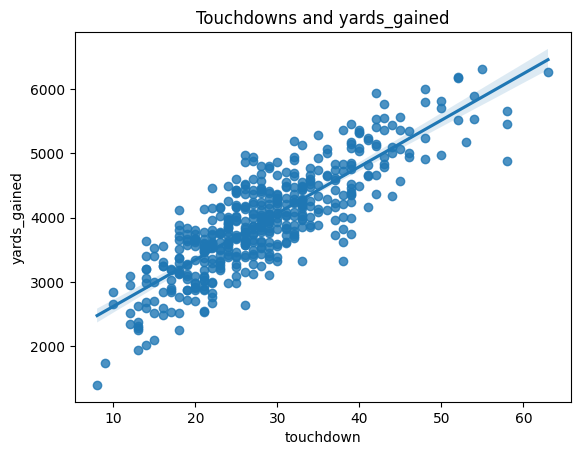

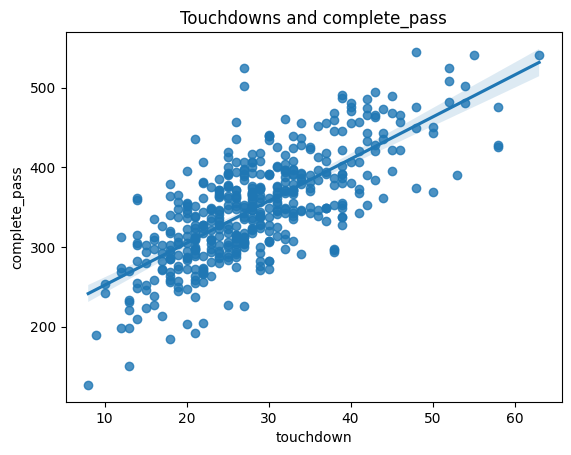

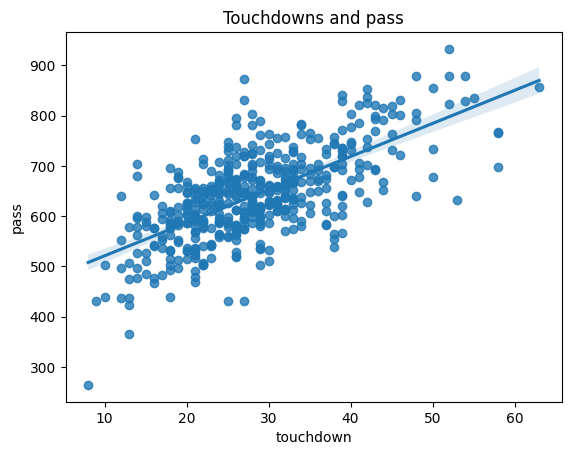

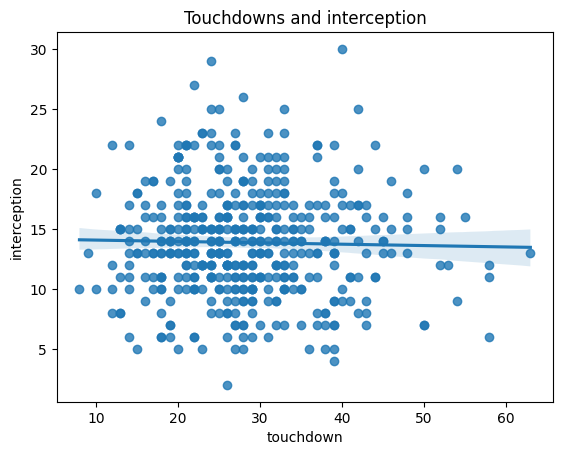

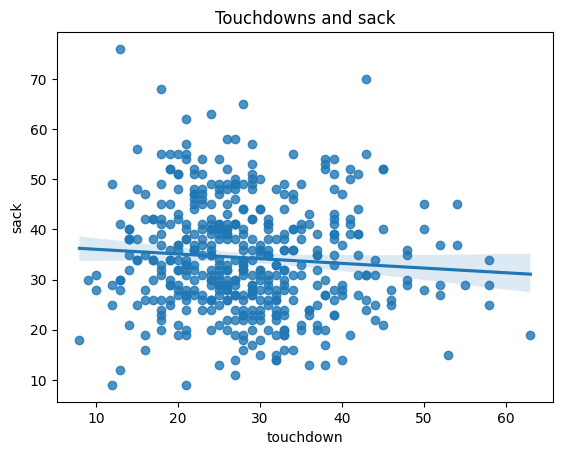

In [105]:
# Find what variables correlate with Touchdowns the most

for i in ['yards_gained', 'complete_pass', 
          'pass', 'interception', 'sack']:
    sns.regplot(data=qb_df, x='touchdown', y=i)
    plt.title(f"Touchdowns and {i}")
    plt.show()

In [106]:
# Find trends within the data to predict future seasons

_df = qb_df.copy()
_df['season'] = _df['season'].add(1)

# Merge new qb df with original qb df
# specify specific columns by using "on=[]" and apply "suffixes=()" to duplicate column names
# create a left join
new_qb_df = (qb_df.merge(_df,
                         on=['season','passer_id', 'passer'],
                         suffixes=('', '_prev'),
                         how='left'))

new_qb_df.sample(10)


,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
34,2001,00-0002110,M.Brunell,569,289.0,13.0,57.0,3091.0,21.0,615.0,311.0,14.0,54.0,3524.0,21.0
79,2003,00-0006355,T.Green,612,348.0,12.0,20.0,4160.0,26.0,528.0,287.0,13.0,26.0,3576.0,26.0
399,2019,00-0031503,J.Winston,743,380.0,30.0,47.0,5079.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
303,2014,00-0029668,A.Luck,855,450.0,20.0,28.0,5700.0,50.0,784.0,392.0,16.0,36.0,4764.0,34.0
419,2020,00-0029604,K.Cousins,610,349.0,13.0,39.0,4157.0,37.0,586.0,347.0,7.0,36.0,3807.0,28.0
260,2012,00-0027973,A.Dalton,654,343.0,17.0,48.0,3687.0,32.0,651.0,327.0,16.0,28.0,3613.0,22.0
456,2022,00-0031280,D.Carr,574,305.0,14.0,27.0,3427.0,27.0,781.0,457.0,15.0,43.0,4968.0,26.0
312,2015,00-0023459,A.Rodgers,829,392.0,9.0,48.0,4344.0,39.0,691.0,384.0,7.0,31.0,4934.0,43.0
76,2003,00-0001823,A.Brooks,606,306.0,8.0,34.0,3495.0,27.0,629.0,283.0,15.0,36.0,3551.0,30.0
198,2009,00-0023460,J.Campbell,596,327.0,15.0,42.0,3581.0,24.0,596.0,315.0,6.0,38.0,3196.0,14.0


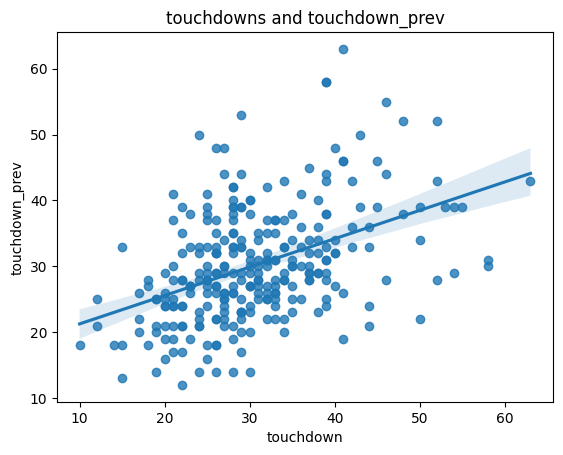

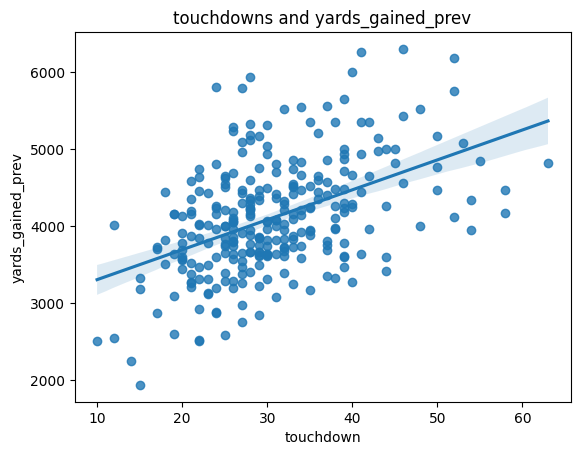

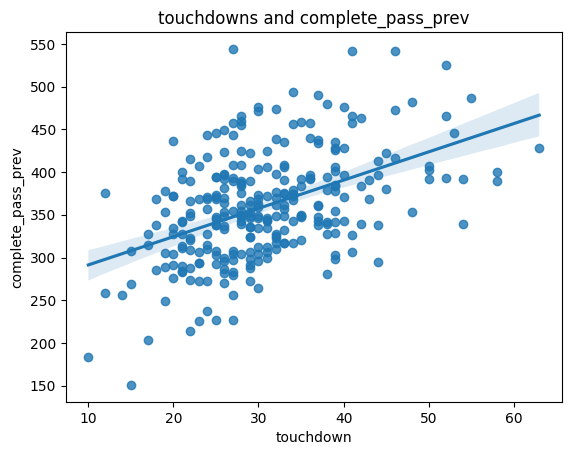

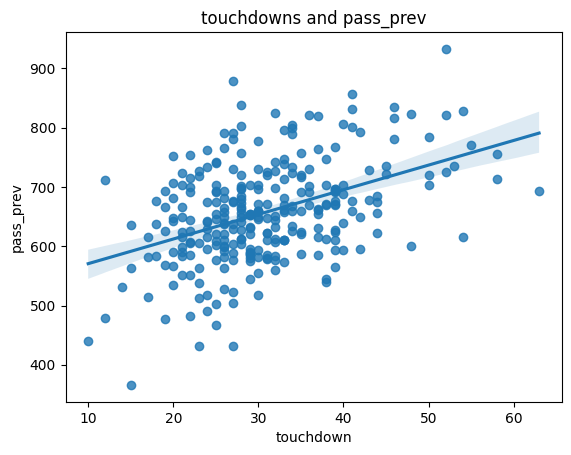

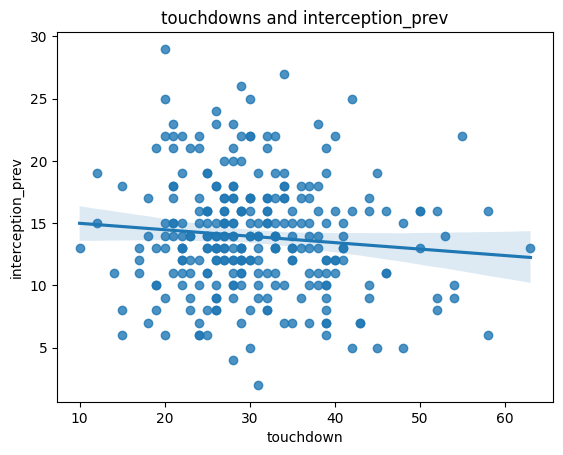

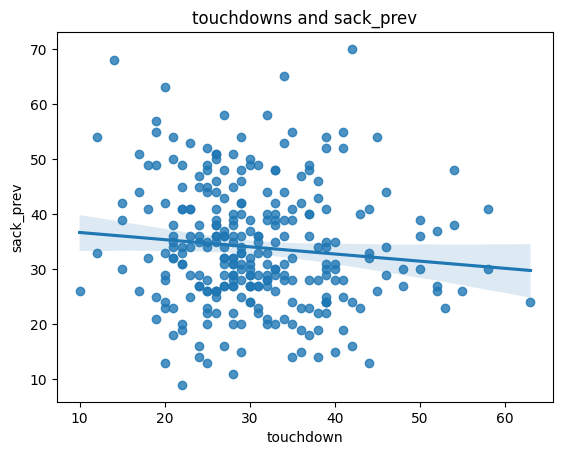

In [107]:
# Find correlations with year to year comparisons

for i in ['touchdown_prev', 'yards_gained_prev', 'complete_pass_prev', 'pass_prev',
          'interception_prev', 'sack_prev']:
    sns.regplot(data=new_qb_df, x='touchdown', y=i)
    plt.title(f"touchdowns and {i}")
    plt.show()

**Machine Learning Model**

**Packages**

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [109]:
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
131,2006,00-0008442,B.Johnson,506,270.0,15.0,28.0,2628.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
234,2011,00-0026158,J.Flacco,692,348.0,13.0,39.0,3947.0,25.0,655.0,347.0,11.0,49.0,3774.0,28.0
248,2012,00-0022942,P.Rivers,616,338.0,15.0,49.0,3348.0,29.0,653.0,366.0,20.0,30.0,4477.0,33.0
151,2007,00-0009311,J.Kitna,649,355.0,21.0,48.0,3803.0,20.0,707.0,372.0,22.0,63.0,3915.0,24.0
220,2010,00-0026993,J.Freeman,566,291.0,6.0,28.0,3603.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
93,2004,00-0001823,A.Brooks,648,309.0,16.0,41.0,3747.0,23.0,606.0,306.0,8.0,34.0,3495.0,27.0
222,2011,00-0007091,M.Hasselbeck,568,319.0,14.0,19.0,3462.0,21.0,590.0,314.0,18.0,32.0,3384.0,24.0
198,2009,00-0023460,J.Campbell,596,327.0,15.0,42.0,3581.0,24.0,596.0,315.0,6.0,38.0,3196.0,14.0
344,2016,00-0031280,D.Carr,641,357.0,6.0,16.0,3965.0,28.0,649.0,350.0,13.0,31.0,3881.0,35.0
433,2021,00-0023459,A.Rodgers,641,386.0,4.0,35.0,4234.0,39.0,697.0,428.0,6.0,25.0,4877.0,58.0


**We Will Conduct Train, Test, Split**

In [115]:
# Use previous season variables as Features for our model
features = ['pass_prev', 'complete_pass_prev', 'interception_prev',
            'sack_prev', 'yards_gained_prev', 'touchdown_prev']

# Variable we are trying to predict
target = 'touchdown'

# Create subset of data with no Null values
model_data = (new_qb_df.dropna(subset=features+[target]))

# Train on all data from 1999-2017
train_data = (model_data.loc[(model_data['season'] >= 1999) & (model_data['season'] <= 2017)])

#train_data = (model_data.loc[(model_data['season'] >= 1999) & (model_data['season'] <= 2021)])


# Test on all data from 2018 to 2022
test_data = (model_data.loc[(model_data['season'] >= 2018) & (model_data['season'] <= 2022)])
#test_data = (model_data.loc[(model_data['season'] == 2022)])

# initialize model as linear regression
model = LinearRegression()

# Train model using the training data
model.fit(train_data.loc[:, features],
          train_data[target])

# Predict new model based on the test data
preds = model.predict(test_data.loc[:, features])

# Set data indexes for predictions
preds = pd.Series(preds, index=test_data.index)

# join predictions back into the test dataset by adding new column of predictions
test_data['preds'] = preds

C:\Users\saadk\AppData\Local\Temp\ipykernel_18240\2717934145.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [116]:
# Use Mean Squared Error to find quality of prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 8.886732314218714
r2: 0.08416952965101579


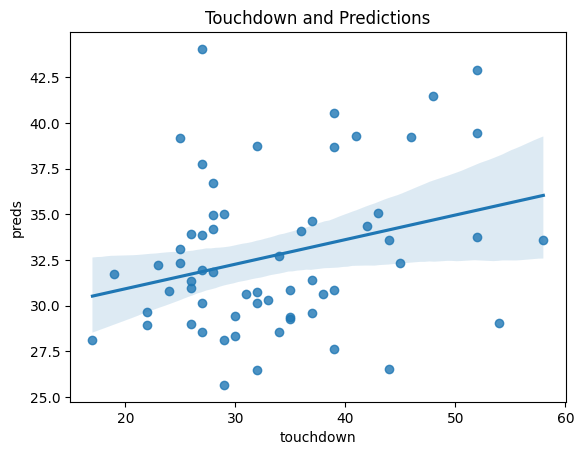

In [117]:
# Visualize the outputs
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('Touchdown and Predictions')
plt.show()

In [118]:
# Show the top 10 Passing Touchdown Leaders from 2018 - 2022
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).head(10)

,season,passer_id,passer,touchdown,preds
414,2020,00-0023459,A.Rodgers,58.0,33.582702
435,2021,00-0026498,M.Stafford,54.0,29.052811
411,2020,00-0019596,T.Brady,52.0,33.774761
458,2022,00-0033873,P.Mahomes,52.0,42.912084
443,2021,00-0033873,P.Mahomes,52.0,39.450990
431,2021,00-0019596,T.Brady,48.0,41.460738
444,2021,00-0034857,J.Allen,46.0,39.256821
418,2020,00-0029263,R.Wilson,45.0,32.307769
446,2021,00-0036355,J.Herbert,44.0,33.614873
428,2020,00-0034857,J.Allen,44.0,26.517974


In [119]:
# Show the top 10 Predicted Passing Touchdown Leaders from 2018 - 2022
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('preds', ascending=False).head(10)


,season,passer_id,passer,touchdown,preds
451,2022,00-0019596,T.Brady,27.0,44.055572
458,2022,00-0033873,P.Mahomes,52.0,42.912084
431,2021,00-0019596,T.Brady,48.0,41.460738
433,2021,00-0023459,A.Rodgers,39.0,40.523940
443,2021,00-0033873,P.Mahomes,52.0,39.450990
459,2022,00-0034857,J.Allen,41.0,39.274046
444,2021,00-0034857,J.Allen,46.0,39.256821
432,2021,00-0022924,B.Roethlisberger,25.0,39.196430
372,2018,00-0019596,T.Brady,32.0,38.754036
406,2019,00-0033873,P.Mahomes,39.0,38.671294
